In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(16,9))
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split , cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor 

from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline , make_pipeline
from sklearn import set_config
set_config(display='diagram')

<Figure size 1152x648 with 0 Axes>

In [2]:
df= pd.read_csv(r'C:\Users\91998\Downloads\insurance.csv')

In [3]:
df.sample(3)

,age,sex,bmi,children,smoker,region,charges
293,22,female,28.820,0,no,southeast,2156.75180
499,62,female,39.200,0,no,southwest,13470.86000
1042,20,male,30.685,0,yes,northeast,33475.81715


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
df.isnull().sum()/len(df)*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

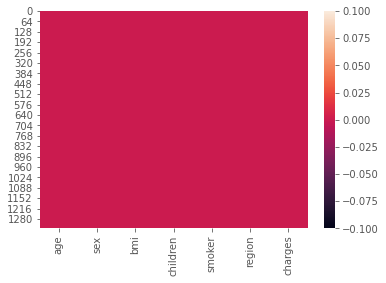

In [9]:
sns.heatmap(df.isnull());

In [10]:
df.duplicated().sum()

1

In [11]:
for i in df.columns:
    k = df[i].unique()
    if len(k)<25:
        print(f" data types of {i} is {df[i].dtypes} and  unique values are {df[i].unique()}  ") 
              
        print(" ")
    else:
        print(f"  data types of {i} is {df[i].dtypes} and no of unique values are {df[i].nunique()}")
        
        print(" ")

  data types of age is int64 and no of unique values are 47
 
 data types of sex is object and  unique values are ['female' 'male']  
 
  data types of bmi is float64 and no of unique values are 548
 
 data types of children is int64 and  unique values are [0 1 3 2 5 4]  
 
 data types of smoker is object and  unique values are ['yes' 'no']  
 
 data types of region is object and  unique values are ['southwest' 'southeast' 'northwest' 'northeast']  
 
  data types of charges is float64 and no of unique values are 1337
 


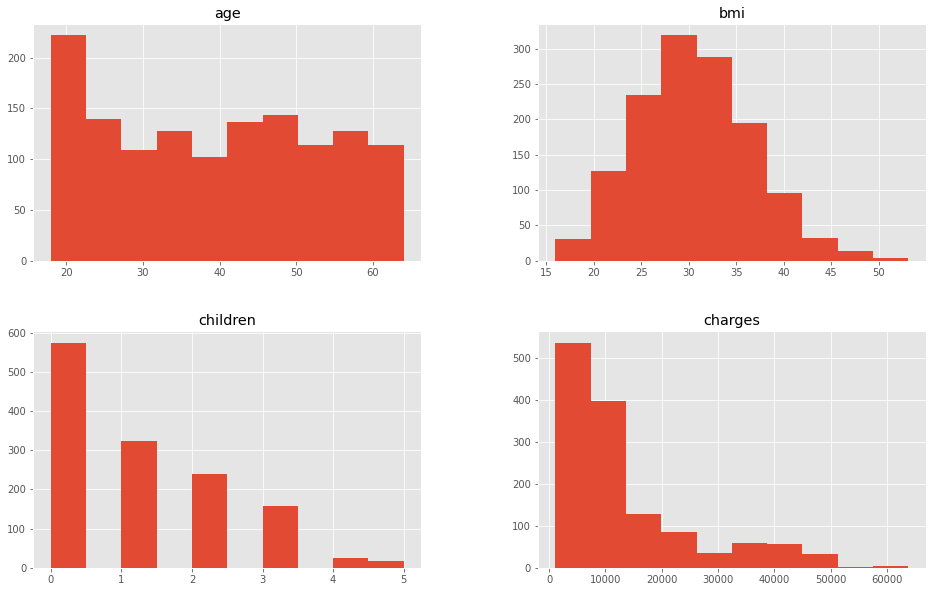

In [13]:
df.hist(figsize=(16,10));

<Figure size 1152x648 with 0 Axes>

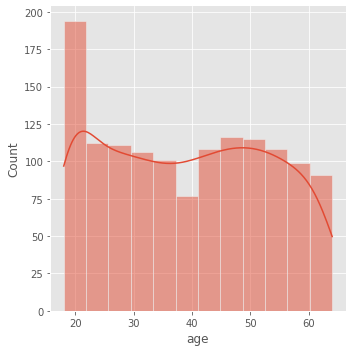

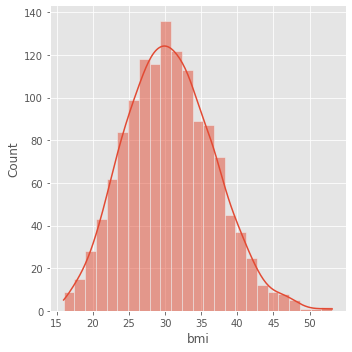

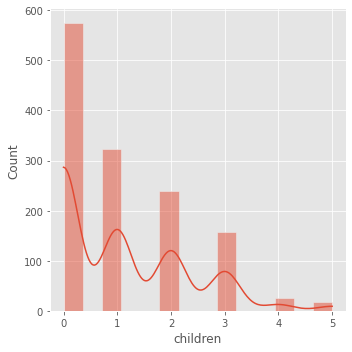

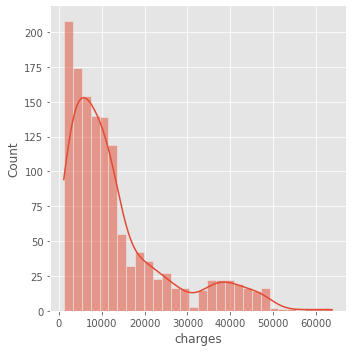

In [16]:
plt.figure(figsize=(16,9))
for i in df.select_dtypes(exclude='object'):
    sns.displot(df[i],kde=True);

In [17]:
outliers_df = pd.DataFrame(columns=df.columns)

for col in df.select_dtypes(include=np.number):
    stat = df[col].describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    
    outliers = df[(df[col] > upper) | (df[col] < lower)]

    if not outliers.empty:
        print(f'\nOutlier found in: {col}')
        outliers_df = pd.concat([outliers_df, outliers])
    else:
        print(f'\nNo outlier found in: {col}')

    print(f'\nSuspected Outliers Lower Bound: {lower}')
    print(f'Suspected Outliers Upper Bound: {upper}\n\n')

print(f'Total Number of outlier rows: {len(outliers_df)}')


count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

No outlier found in: age

Suspected Outliers Lower Bound: -9.0
Suspected Outliers Upper Bound: 87.0


count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

Outlier found in: bmi

Suspected Outliers Lower Bound: 13.7
Suspected Outliers Upper Bound: 47.290000000000006


count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

No outlier found in: children

Suspected Outliers Lower Bound: -3.0
Suspected Outliers Upper Bound: 5.0


count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
2

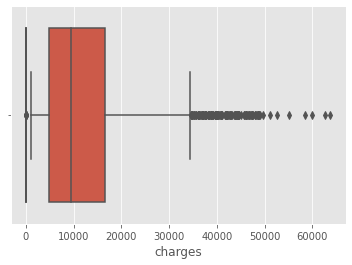

In [18]:
for i in df.select_dtypes(exclude='object'):
    sns.boxplot(data=df,x=df[i])

In [19]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
870,50,male,36.2,0,no,southwest,8457.818


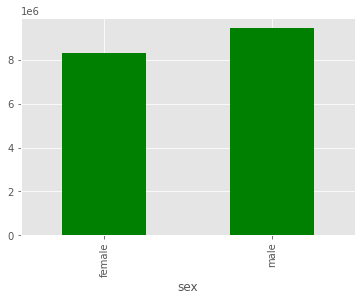

In [21]:
df.groupby('sex')['charges'].sum().plot(kind='bar',color='green');

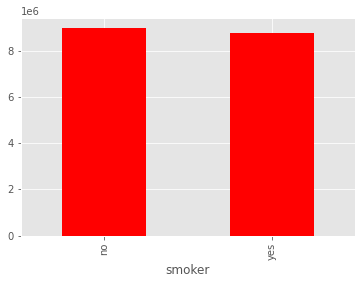

In [23]:
df.groupby('smoker')['charges'].sum().plot(kind='bar',color='red');

In [22]:
pd.crosstab(df['smoker'],df['sex'])

sex,female,male
smoker,,
no,547,517
yes,115,159


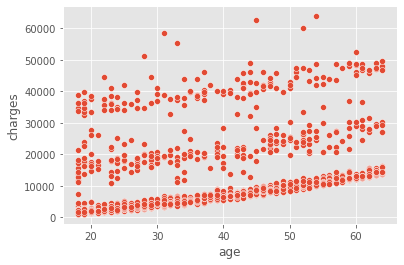

In [24]:
sns.scatterplot(data=df,x='age',y='charges');

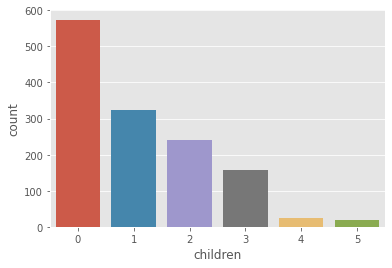

In [28]:
sns.countplot(data=df,x='children');

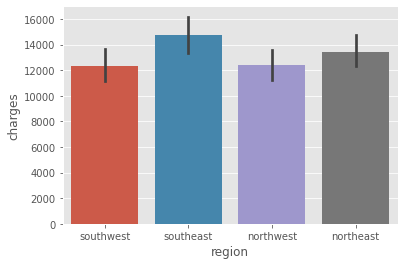

In [30]:
sns.barplot(data=df,x='region',y='charges');

In [31]:
df.sample()

,age,sex,bmi,children,smoker,region,charges
933,45,female,35.3,0,no,southwest,7348.142


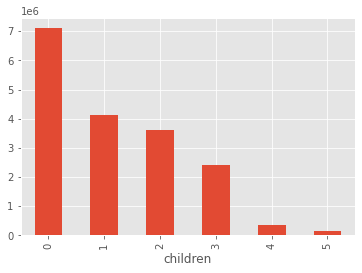

In [33]:
df.groupby('children')['charges'].sum().sort_values(ascending=False).plot(kind='bar');

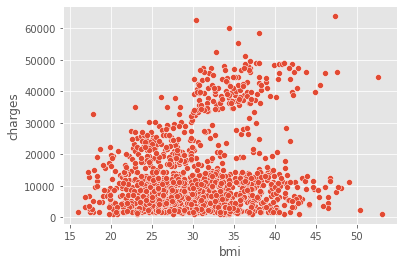

In [34]:
sns.scatterplot(data=df , x='bmi',y='charges');

In [128]:
num_feature = df.drop('charges',axis=1).select_dtypes(exclude='object').columns
cat_feature = df.select_dtypes(include='object').columns

In [129]:
num_feature

Index(['age', 'bmi', 'children'], dtype='object')

In [130]:
cat_feature

Index(['sex', 'smoker', 'region'], dtype='object')

In [131]:
numeric_transformer = Pipeline(
     steps=[ ("imputer", SimpleImputer(strategy='median'))
               , ("scaler", StandardScaler())
           ]
 )
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [132]:
categorical_transformer = Pipeline(
     steps=[
         ("imputer_cat", SimpleImputer(strategy='most_frequent')),
        ("encoder", OneHotEncoder(sparse=False,handle_unknown='ignore')),
        ("scaler", StandardScaler())
               ]
)
categorical_transformer

Pipeline(steps=[('imputer_cat', SimpleImputer(strategy='most_frequent')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('scaler', StandardScaler())])

In [133]:
preprocessor = ColumnTransformer(
    transformers=[
         ("num", numeric_transformer, num_feature),
         ("cat", categorical_transformer, cat_feature),
     ]
 )
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age', 'bmi', 'children'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer_cat',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False)),
                                                 ('scaler', StandardScaler())]),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

In [134]:
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
            ("model", RandomForestRegressor()
           
           )
          ]
 )


In [135]:
X=df.drop(columns=['charges'])

In [136]:
X.shape

(1338, 6)

In [137]:
y=df['charges']

In [138]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=10, scoring='r2').mean()

0.8373439764193753

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [140]:
# train
pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('model', RandomForestRegressor())])

In [141]:
y_pred = pipe.predict(X_test)
y_train_pred = pipe.predict(X_train)

In [142]:
r2_score(y_test,y_pred)

0.8793921441362866

In [143]:
r2_score(y_train,y_train_pred)

0.974886448200525